In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\test01\Desktop\AI\flood data.csv")
dataset.isnull().any()

Unnamed: 0    False
Temp          False
Humidity      False
Cloud         False
ANNUAL        False
Jan-Feb       False
Mar-May       False
Jun-Sep       False
Oct-Dec       False
avgjune       False
sub           False
flood         False
dtype: bool

In [3]:
dataset.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
dataset.drop(columns=["Jun-Sep","Oct-Dec"],inplace=True)

In [5]:
dataset.head()

,Temp,Humidity,Cloud,ANNUAL,Jan-Feb,Mar-May,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,283.400000,586.9,0


In [6]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_dt=metrics.auc(fpr,tpr)

In [8]:
roc_auc_dt

0.857843137254902

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8695652173913043

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='dt.dot',
               feature_names=["Temp","Humidity","Cloud","ANNUAL","Jan-Feb","Mar-May","avgjune","sub"],
               class_names=['0','1'],
               rounded=True,
               proportion=False,
               precision=2,
               filled=True)

In [11]:
!dot dt.dot -Tpng -o image.png

In [12]:
import matplotlib.image as mpimg

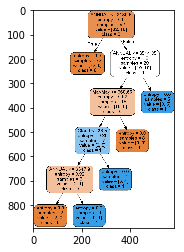

In [13]:
plt.imshow(mpimg.imread(r"image.png"))